In [ ]:
#Librerias para usar Google Drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import display, HTML

In [3]:
#Leer_Datos
data_iris = pd.read_csv('/content/drive/My Drive/2020-1/Data TIA/iris2.csv',sep=',' ,header=0)
data_ec = pd.read_csv('/content/drive/My Drive/2020-1/Data TIA/Enfermedad_Cardiaca.csv',sep='\t' ,header=0)

data_iris_v = data_iris.values
data_ec_v = data_ec.values

print(data_iris_v.shape)
print(data_ec_v.shape)

(150, 5)
(303, 14)


In [4]:
def Sigmoidal(X):
  z = 1/(1 + np.exp(-X))
  return z

def Funcion_Costo(salida, valor_r):
  loss = np.square(salida - valor_r).sum()
  loss = loss/(2*len(salida))
  return loss

def Normalizar_Datos( data ):
  last = np.array(data[:,-1])
  #print(last)
  mean = np.mean(data,0)
  stdd = np.std(data,0)
  for i in range(0,data.shape[0]):
    data[i] = np.true_divide((data[i] - mean), stdd)
  data[:,-1] = last[:]
  return data


def Crear_k_folds(data, lc, k):
  data = data.sort_values(lc).values
  #print(data)
  Normalizar_Datos(data)
  #print(data)
  r = np.where(np.diff(data[:,-1]))[0]+1
  ceros, unos = np.split(data,r)

  folds0 = np.array_split(ceros, k)
  folds1 = np.array_split(unos, k)
  
  rpta = list()

  for i in range(k):
    conc = np.concatenate((folds0[i],folds1[i]))
    np.random.shuffle(conc)
    rpta.append(conc)

  return rpta

def Crear_k_folds2(data, lc, k):

  data = data.sort_values(lc).values
  Normalizar_Datos(data)
  np.random.shuffle(data)
  folds = np.array_split(data, k)

  return folds

def split_Tr_Te(folds, it , k):
  tr = np.array([])
  te = np.array([])
  for i in range(k):
    if i in it:
      if len(te) == 0:
        te = folds[i]
      else:
        te = np.concatenate((te,folds[i]))
    else:
      if len(tr) == 0:
        tr = folds[i]
      else:
        tr = np.concatenate((tr,folds[i]))
  return tr, te


In [ ]:


p1 = Perceptron(x_t,[2,4,3],1e-1)
p1.crear_rpta()
p1.print_w()

#p1.forward()

#p1.add_bias()
#print(p1.w_v)
#p1.backward(y_t)
p1.train(1000, y_t)

ooo 2
(3, 4)
(5, 3)


In [52]:
class Perceptron:
  def __init__(self, data, n_neuronas_v,alpha):
    self.data = data
    self.n_capas = len(n_neuronas_v)
    self.n_neuronas_v = n_neuronas_v
    self.alpha = alpha
    self.z_v = [] #matrices z
    self.w_v = [] #matrices w
    self.rpta = [] #opciones de rpta
    for i in range(self.n_capas-1):
      self.w_v.append(np.random.randn(n_neuronas_v[i]+1, n_neuronas_v[i+1]))
  
  def crear_rpta(self):
    self.rpta = np.eye(self.n_neuronas_v[-1])
    #print(self.rpta)

  def print_w(self):
    print("oWo",len(self.w_v))
    for i in range(len(self.w_v)):
      print(self.w_v[i].shape)

  def print_z(self):
    print("oZo",len(self.z_v))
    for i in range(len(self.z_v)):
      print(self.z_v[i].shape)

  def forward(self):
    x = self.data
    self.z_v = []
    self.z_v.append(self.data)
    for i in range(len(self.w_v)):
      x = np.c_[ x, np.ones(len(x)) ] #bias
      z = x.dot(self.w_v[i])
      x = Sigmoidal(z)
      self.z_v.append(x) 
      #print("SHAPE")
      #print(x.shape)
    return x

  def forward_t(self,x):
    self.z_v = []
    self.z_v.append(self.data)
    for i in range(len(self.w_v)):
      x = np.c_[ x, np.ones(len(x)) ] #bias
      z = x.dot(self.w_v[i])
      x = Sigmoidal(z)
      self.z_v.append(x) 
    return x

  def add_bias(self):
    #print(self.z_v)
    for i in range(len(self.z_v)-1):
      self.z_v[i] = np.c_[ self.z_v[i], np.ones(len(self.z_v[i])) ] #bias
    #print(self.z_v)

  def backward(self, y):
    #print("bk")
    #self.print_z()
    wr_v=[]
    r = -(y-self.z_v[-1])
    r = r * self.z_v[-1] * (1-self.z_v[-1])
    w1 = self.z_v[-2].T.dot(r)
    wr_v.append(self.alpha * w1)
    #self.w_v[-1] -= self.alpha * w1
    
    #print("r shape",r.shape)
    
    for i in range(2, len(self.w_v)+1):
      #print("dentro for",i)
      r = r.dot(self.w_v[-i+1].T) # r*w
      r = r* self.z_v[-i] * (1-self.z_v[-i]) #a(1-a)
      t = np.delete(r, -1, 1) # T Dm-1 
      w_t = self.z_v[-i-1].T.dot(t) # *a
      wr_v.append(self.alpha * w_t) # add list
      r = t
      #self.w_v[-i] -= self.alpha * w_t

    #print(self.w_v)
    for j in range(len(self.w_v)):
      self.w_v[j] -= wr_v[-(j+1)]
    #print(self.w_v)
      

  def train(self, n, y_t):
    l_v = []
    for i in range(n):
      
      self.forward()
      p1.add_bias()
      self.backward(y_t)
      loss = Funcion_Costo(self.z_v[-1],y_t)
      #print(i, loss)
      l_v.append(loss)
      #Accuracy(self, self.data, y_t)
    
    #print(self.z_v[-1])

    

    return l_v

  def convR(self, y):
    val = []
    #print(self.rpta)
    for i in range(len(y)):
      val.append(self.rpta[int(y[i])])

    return val



In [ ]:
x_t = np.random.randn(8, 2) 
y_t = np.random.randn(8, 3) 

In [67]:
def gen_Tr_Te(te_s,tr_s):
  te_y = te_s[:,-1:]
  te_x = te_s[:,0:-1]
  tr_y = tr_s[:,-1:]
  tr_x = tr_s[:,0:-1]

  
  return tr_x, tr_y, te_x, te_y

def Accuracy(perc, x_p , y_real):
  c = 0
  for i in range(len(y_real)):
    t = x_p[i]
    t = t.reshape(len(t),1)
    r_perc = perc.forward_t(t.T).round()[0]

    if(r_perc == y_real[i]).all():
      c = c+1

  i = len(y_real) 
  v = (c/i) * 100

  return v


In [7]:

full_Card = Crear_k_folds(data_ec,'target',3)
full_Iris = Crear_k_folds2(data_iris,'variety',3)

In [76]:


alphas = [0.1] #,0.2,0.3, 0.4, 0.5]
its = [500] #, 1000, 1500, 2000, 2500]

rpta = np.zeros([len(alphas),len(its)])

costos_v = []
for k in range(3):
  tr_Card, te_Card = split_Tr_Te(full_Card,[k],3)
  tr_Card_x, tr_Card_y, te_Card_x, te_Card_y = gen_Tr_Te(tr_Card,te_Card)

  for a in  range(len(alphas)):
    for itr in range(len(its)):
      p1 = Perceptron(te_Card_x,[13,7, 5,2],alphas[a])
      p1.crear_rpta()
      y_v = p1.convR(te_Card_y)
      l_v = p1.train(its[itr], y_v )

      acc = Accuracy(p1, tr_Card_x, p1.convR(tr_Card_y))

      rpta[a,itr] += acc

      costos_v.append(l_v)

rpta = rpta/3
C_Diab = pd.DataFrame(data = rpta, index= alphas, columns = its)

C_Diab

,500
0.1,79.207921


Text(0, 0.5, 'Costo')

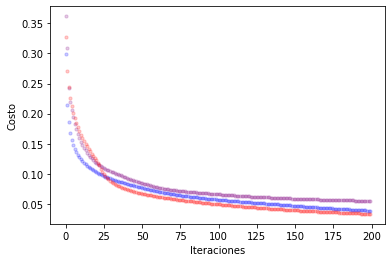

In [28]:
plt.scatter(np.arange(200),costos_v[0], s=10,c='purple',alpha=0.2)
plt.scatter(np.arange(200),costos_v[1], s=10,c='blue',alpha=0.2)
plt.scatter(np.arange(200),costos_v[2], s=10,c='red',alpha=0.2)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

In [77]:
rpta = np.zeros([len(alphas),len(its)])

for k in range(3):
  tr_Iris, te_Iris = split_Tr_Te(full_Iris,[k],3)
  tr_Iris_x, tr_Iris_y, te_Iris_x, te_Iris_y = gen_Tr_Te(te_Iris,te_Iris)

  
  for a in  range(len(alphas)):
    for itr in range(len(its)):
      p1 = Perceptron(te_Iris_x,[4,4,2,3,4,3],alphas[a])
      p1.crear_rpta()
      y_v = p1.convR(te_Iris_y)
      l2 = p1.train(its[itr], y_v )

      rpta[a,itr] += Accuracy(p1, tr_Iris_x, p1.convR(tr_Iris_y))

rpta = rpta/3
C_Diab = pd.DataFrame(data = rpta, index= alphas, columns = its)

C_Diab

,500
0.1,98.666667


Text(0, 0.5, 'Costo')

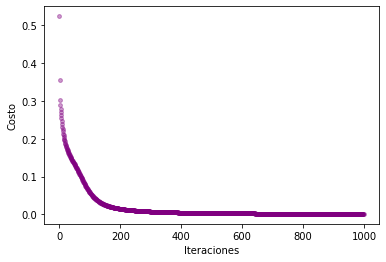

In [ ]:
plt.scatter(np.arange(1000),l2, s=15,c='purple',alpha=0.4)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')